# Tutorial 2: Modelling Change


## Introduction

A **difference equation** defines a sequence by the difference between consecutive terms. To fully specify the sequence we also need an initial value. For example,

$$x_{i+1} = x_i + 0.1x_i \quad\mathrm{where}\quad x_0=10$$

defines a sequence where the initial value is $10$ and each term is $10\%$ bigger than the previous term.

Let's calculate the first 5 terms using Python. First, we create an array and set its first element to the initial value $10$.

In [13]:
import numpy as np

x = np.zeros(5)

x[0] = 10
print("x:", x)

x: [10.  0.  0.  0.  0.]


Next we use a `for` loop to calculate the remaining terms of the sequence.

In [14]:
for i in range(4):
    x[i+1] = x[i] + 0.1*x[i] 
    
print("x:", x)

x: [ 10.  20.  40.  80. 160.]


```{exercise}


The array `x` has $5$ elements yet the upper limit of the `for` loop is $4$. Why? Try changing the upper limit to $5$ and see what happens.
```
Finally, we would like to plot a graph of the population for the first $5$ days. To do this we need to import a library, `matplotlib.pyplot`:



In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.plot(x)
plt.xlabel("i")
plt.ylabel("x[i]")

: 

:::{exercise}

Calculate the value of $x_{16}$. Print the answer as follows:

```x[16]: XXXX```

:::

## Multiple Variables

We can produce more interesting behaviour if we introduce a second variable. For example,

$$\begin{align*}
x_{i+1} &= x_i - 0.5y_i\\
y_{i+1} &= y_i + 0.4x_i\quad\mathrm{where}~x_0=y_0=10.
\end{align*}$$

:::{exercise}

Complete the following code to calculate and plot `x` and `y` over the range `0 ... 19`.

```
x = np.zeros(20)
x[0] = 10

# create array y and set initial value

for i in range(19):
    x[i+1] = x[i] - 0.5 * y[i]  

    # set value of y[i+1]

plt.figure(figsize=(3,3))
plt.plot(x)

# plot y on the SAME graph    
```
:::





In [ ]:
x = np.zeros(20)
x[0] = 10

# create array y and set initial value
y = np.zeros(20)
y[0] = 10


for i in range(19):
    x[i+1] = x[i] - 0.5 * y[i]
    # set value of y[i+1]
    y[i+1] = y[i] + 0.4 * x[i]

plt.figure(figsize=(3,3))
plt.plot(x)

# plot y on the SAME graph
plt.plot(y)

: 

## SIR Model of Epidemics

The spread of an infectious disease amongst a population can be modelled by the SIR model. We divide the the population into three groups: Susceptible, Infected and Recovered. As the epidemic progresses, the number of people in each group changes according to a set of simple rules. Let the $S_i$ represent the number of susceptible people and $I_i$ the number of infected people on day $i$. Then:

:::{math}
:label: SIR_equations
\begin{align}S_{i+1} &= S_i - bS_iI_i\\
I_{i+1} &= I_i + bS_iI_i - aI_i.\end{align}
:::

We assume a fixed total population so that the number of people in the Recovered group is given by

$$R_i = N - (S_i + I_i)$$

where $N$ is the total population. There are two parameters: the recovery rate parameter $a$ and the infection rate parameter $b$.

### Simplified Model

First, let's examine a simplified version of this model where we assume that there are no susceptible people in the population and an initial population $I_0$ of infected people. Then, the equations reduce to:

$$ I_{i+1} = I_i - aI_i $$

A fixed proportion $a$ of the infected population recovers at each time step. Let's suppose that 10% of the population recovers each day so that $a=0.1$, and assume that our population starts with $I_0=1000$ infected people.

```{exercise}

Calculate (by hand) the first few terms of the sequence. What would you expect the graph $I_i$ to look like?

Write Python code to model the number of infected people for $100$ days. Plot a graph of $I_i$.
```

I_0: [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
I: [100.         90.         81.         72.9        65.61       59.049
  53.1441     47.82969    43.046721   38.7420489]


Text(0, 0.5, 'Infected population')

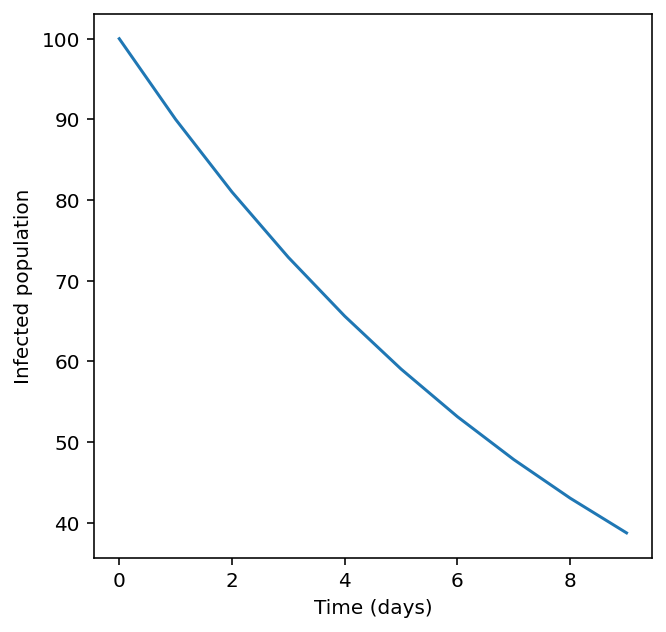

In [18]:
import numpy as np

n_days = 100

I = np.zeros(n_days)

I[0] = 100

for i in range(n_days - 1):
    I[i+1] = I[i] - 0.1 * I[i]

plt.figure(figsize=(5,5))
plt.plot(I)
plt.xlabel("Time (days)")
plt.ylabel("Infected population")

### Full Model

```{exercise}

Adapt your code to models the full set of two equations {eq}`SIR_equations`. With parameter values $a = 0.1$ and $b = 0.00005$ and the initial populations $S_0 = 20000$ and $I_0 = 100$, simulate the infection for a duration of 100 days. Plot the resulting arrays `S` and `I` on the same figure.

[You should see that the number of infected people peaks at around 15000 at about day 15, while the number of susceptible people drops to about zero at about the same time].
```

In [ ]:
import numpy as np

n_days = 100
b = 0.00005

I = np.zeros(n_days)
I[0] = 100
S = np.zeros(n_days)
S[0] = 20000

for i in range(n_days - 1):
    I[i+1] = I[i] + b*S[i]*I[i]- 0.1 * I[i]
    S[i+1] = S[i] - b*S[i]*I[i]

plt.figure(figsize=(5,5))
plt.plot(I)
plt.plot(S)
plt.xlabel("Time (days)")
plt.ylabel("Population")

```{exercise}

The infection rate parameter $b$ can be influenced by public policy - for example the imposition of social distancing, vaccination or other measures. 

Experiment with various values of $b$ to see how it affects the outbreak. Roughly what is the minimum value of $b$ which results in an epidemic? (We say there is an epidemic if $I_i$ initially rises to a peak, however small).

```